In [1]:
'''
Pandas Homework with IMDb data
'''

'\nPandas Homework with IMDb data\n'

In [31]:
'''
BASIC LEVEL
'''

import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
movies= pd.read_csv('imdb_1000.csv')

In [30]:
# check the number of rows and columns
movies.shape

(979, 6)

In [9]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [11]:
# calculate the average movie duration
movies.duration.mean()

120.97957099080695

In [12]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


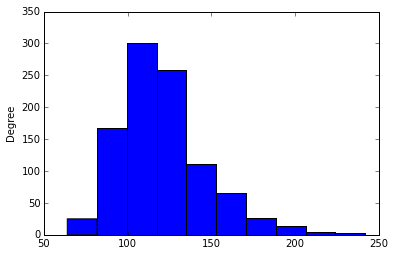

In [16]:
# create a histogram of duration, choosing an "appropriate" number of bins
%matplotlib inline
movies.duration.plot(kind='hist', bins =10)

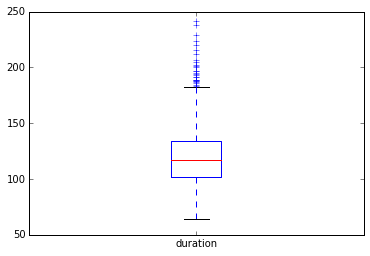

In [17]:
# use a box plot to display that same data
movies.duration.plot(kind='box')

In [18]:
'''
INTERMEDIATE LEVEL
'''

# count how many movies have each of the content ratings
movies.content_rating.value_counts()  

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
dtype: int64

AttributeError: 'DataFrame' object has no attribute 'set_ylabel'

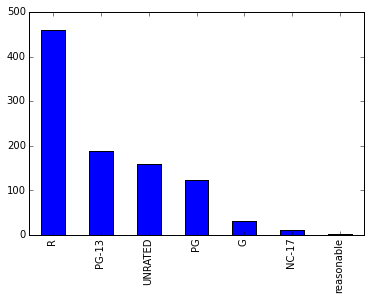

In [87]:
# use a visualization to display that same data, including a title and x and y labels
movies.content_rating.value_counts().plot(kind='bar',label='No. of Rating Occurences')
movies.set_ylabel('Occurences')
movies.set_xlabel('Rating')

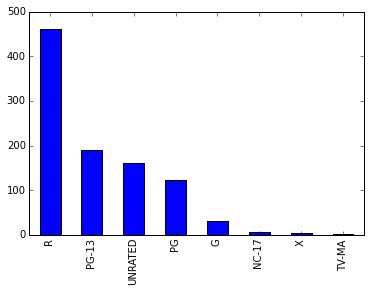

In [36]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.content_rating.replace('NOT RATED', 'UNRATED',inplace=True)
movies.content_rating.replace('APPROVED', 'UNRATED',inplace=True)
movies.content_rating.replace('PASSED', 'UNRATED',inplace=True)
movies.content_rating.replace('GP', 'UNRATED',inplace=True)
                              

In [37]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.content_rating.replace('X', 'NC-17',inplace=True)
movies.content_rating.replace('TV-MA', 'NC-17',inplace=True)

In [40]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [43]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies.content_rating.isnull()]
movies.content_rating.fillna(value ='reasonable', inplace = True)

In [56]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
below2 =movies.star_rating[movies.duration>120].mean()
above2 =movies.star_rating[movies.duration<120].mean()

print "* ratings of movies below 2 hours=",below2,"","* ratings of movies above 2 hours=",above2


* ratings of movies below 2 hours= 7.95366972477  * ratings of movies above 2 hours= 7.83866666667


In [47]:
# use a visualization to detect whether there is a relationship between duration and star rating
movies.star_rating[movies.duration>120].mean()

7.953669724770622

In [86]:
# calculate the average duration for each genre
movies.duration.mean()

120.97957099080695

In [19]:
'''
ADVANCED LEVEL
'''

# visualize the relationship between content rating and duration
movies.plot(kind='scatter',x='star_rating',y='duration')

'\nADVANCED LEVEL\n'

In [27]:
# determine the top rated movie (by star rating) for each genre
movies.sort('star_rating').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."


In [21]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates


In [22]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies


In [23]:
# option 1: manually create a list of relevant genres, then filter using that list


In [24]:
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering


In [25]:
# option 3: calculate the average star rating for all genres, then filter using a boolean Series


In [26]:
# option 4: aggregate by count and mean, then filter using the count


In [27]:
'''
BONUS
'''

# Figure out something "interesting" using the actors data!


'\nBONUS\n'